## **Section1 Project** / AI07_서다빈

1. 지역에 따라서 선호하는 게임 장르가 다를까? 

2. 연도별 게임의 트렌드가 있을까? 

3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스 

#**데이터 전처리**

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/df_pj1.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
#데이터 정보 및 결측치 확인
df.drop(df.columns[0],axis = 1,inplace = True)

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
#데이터 정보 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
#결측치 처리
print(df.isnull().sum())
#결측치는 제거할까 대체할까? 
#결측치가 있는 항목 : 연도,장르,게임 회사 / 16597개 중 379개로 큰 영향x -> 제거 
df=df.dropna()
print(df.isnull().sum())

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


In [ ]:
#출고량 단위 변환
def tofloat(n):
  try:
    float(n)
  except:
    if 'M' in n:
      n = n[:-1]
    elif "K" in n:
      n = float(n[:-1])/1000
  return n

df['NA_Sales'] = df['NA_Sales'].apply(tofloat).astype(float)
df['EU_Sales'] = df['EU_Sales'].apply(tofloat).astype(float)
df['JP_Sales'] = df['JP_Sales'].apply(tofloat).astype(float)
df['Other_Sales'] = df['Other_Sales'].apply(tofloat).astype(float)

In [ ]:
#연도별로 변화를 보려면 선그래프

#Year 값 4글자로 동일하게 맞추고 숫자형태
date = df['Year']

def year(date) :
    if  0 <= date <= 20 : 
        return 2000+date
    elif 21 <= date <= 99 :
        return 1900+date
    elif 1900<= date < 3000 : 
        return date

df['Year'] = df['Year'].apply(year)
df['Year'].value_counts()

2009.0    1428
2008.0    1423
2010.0    1253
2007.0    1195
2011.0    1133
2006.0    1005
2005.0     934
2002.0     826
2003.0     774
2004.0     740
2012.0     652
2015.0     611
2014.0     580
2013.0     545
2001.0     480
1998.0     377
2000.0     348
2016.0     342
1999.0     336
1997.0     289
1996.0     262
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       8
2017.0       3
2020.0       1
Name: Year, dtype: int64


#**필수 과제 1) 지역에 따라서 선호하는 게임 장르가 다를까?**



In [ ]:
#cross-tabulation 
#tidy data

In [ ]:
#지역별 장르 선호도 조사
#장르x지역 데이터 생성
df_genre = df.groupby('Genre').sum()
df_genre.drop(df_genre.columns[0],axis = 1,inplace = True)
df_genre.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45


In [ ]:
from scipy.stats import chi2_contingency
df_genre_chi2 = chi2_contingency(df_genre,correction=False)
print(df_genre_chi2)

(684.336340516923, 9.635373883711956e-123, 33, array([[842.66837143, 468.29974503, 248.7462714 , 153.26561214],
       [115.12174823,  63.97710792,  33.98265154,  20.93849231],
       [218.19118114, 121.25633043,  64.40759449,  39.68489393],
       [383.55878598, 213.15678595, 113.22226051,  69.76216756],
       [407.31414544, 226.35845479, 120.23457673,  74.08282303],
       [118.42260683,  65.81150838,  34.95702805,  21.53885674],
       [355.44491575, 197.53294304, 104.92336069,  64.64878052],
       [443.48093003, 246.45757869, 130.91060674,  80.66088454],
       [504.10653576, 280.14930922, 148.80660697,  91.68754804],
       [191.49899218, 106.42256462,  56.52835908,  34.83008412],
       [642.13752173, 356.85786709, 189.55180907, 116.79280211],
       [ 85.09426549,  47.28980484,  25.11887472,  15.47705495]]))


 ***가설 검정 : 지역별 선호장르의 연관성 파악***

 chi square test 진행
1.   귀무가설 : 지역별로 선호하는 장르는 연관이 없다.
2.   대립가설 : 지역별로 선호하는 장르는 연관이 있다. 

p값(4.2091563967215527e-57)은 0.05보다 작으므로 귀무가설을 기각한다.

결론 : 지역과 장르는 독립적이지 않고 지역별로 선호하는 장르가 있다.

**지역별 선호 장르에 대한 시각화**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd

In [ ]:
df_genre_T = df_genre.T
df_genre_T

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,858.75,101.79,220.35,394.73,445.38,121.58,354.70,318.76,574.48,181.43,667.26,67.83
EU_Sales,513.64,63.66,99.90,208.15,200.63,50.47,235.02,183.09,310.23,112.99,370.97,44.82
JP_Sales,156.60,51.87,87.14,104.18,130.53,56.24,56.32,342.93,38.18,63.54,134.76,49.10
Other_Sales,183.99,16.70,36.15,72.64,51.45,12.44,76.51,56.73,101.86,31.32,132.35,11.23


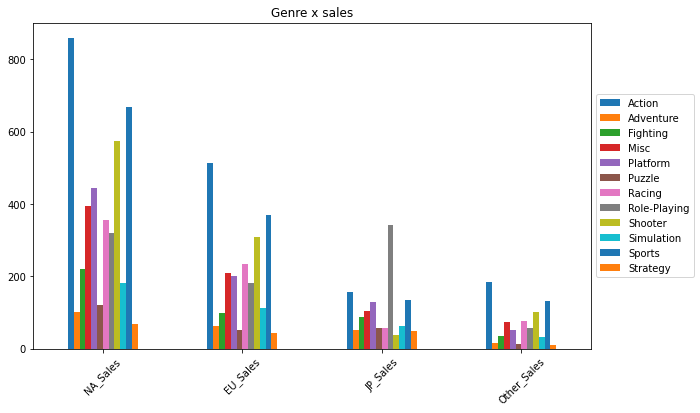

In [ ]:
df_genre_T.plot(kind='bar',figsize=(10,6));
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title("Genre x sales")
plt.xticks(rotation =  45 )
plt.show()

In [ ]:
df_genre_T.reset_index(inplace=True)
df_genre_T_tidy = df_genre_T.melt(id_vars = 'index', value_vars = df_genre_T.columns[1:])
df_genre_T.head()

Genre,index,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,NA_Sales,858.75,101.79,220.35,394.73,445.38,121.58,354.70,318.76,574.48,181.43,667.26,67.83
1,EU_Sales,513.64,63.66,99.90,208.15,200.63,50.47,235.02,183.09,310.23,112.99,370.97,44.82
2,JP_Sales,156.60,51.87,87.14,104.18,130.53,56.24,56.32,342.93,38.18,63.54,134.76,49.10
3,Other_Sales,183.99,16.70,36.15,72.64,51.45,12.44,76.51,56.73,101.86,31.32,132.35,11.23


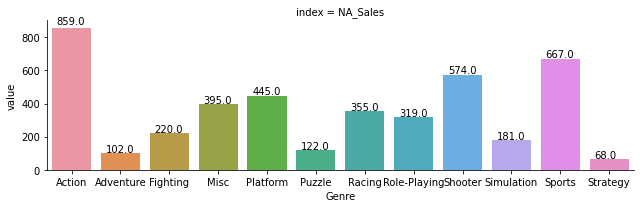

In [ ]:
NA = df_genre_T_tidy.groupby('index').get_group('NA_Sales')
EU = df_genre_T_tidy.groupby('index').get_group('EU_Sales')
JP = df_genre_T_tidy.groupby('index').get_group('JP_Sales')
OT = df_genre_T_tidy.groupby('index').get_group('Other_Sales')

NA_G = sb.catplot(x = 'Genre', y = 'value', col = 'index', kind = 'bar', 
                     data = NA ,height = 3,aspect = 3)

ax = NA_G.facet_axis(0,0)
for p in ax.patches:
  ax.text(p.get_x() + 0.1,
          p.get_height() * 1.02,
          round(p.get_height(),0),
          color = 'black',
          size = 'medium',
          rotation = 'horizontal')

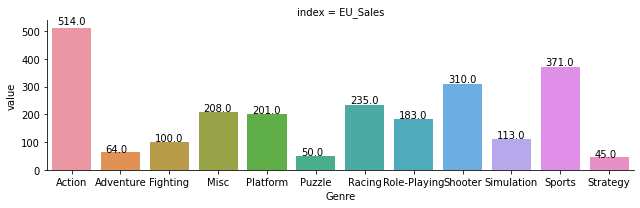

In [ ]:
EU_G = sb.catplot(x = 'Genre', y = 'value', col = 'index', kind = 'bar', 
                     data = EU, height = 3,aspect = 3 )
ax = EU_G.facet_axis(0,0)
for p in ax.patches:
  ax.text(p.get_x() + 0.1,
          p.get_height() * 1.02,
          round(p.get_height(),0),
          color = 'black',
          size = 'medium',
          rotation = 'horizontal')

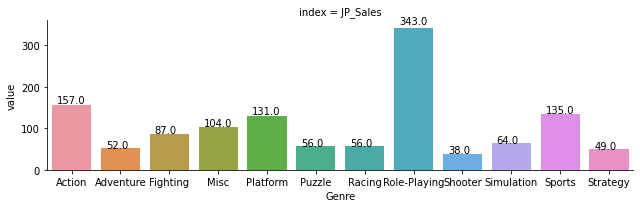

In [ ]:
JP_G = sb.catplot(x = 'Genre', y = 'value', col = 'index', kind = 'bar', 
                     data = JP, height = 3,aspect = 3 )
ax = JP_G.facet_axis(0,0)
for p in ax.patches:
  ax.text(p.get_x() + 0.1,
          p.get_height() * 1.02,
          round(p.get_height(),0),
          color = 'black',
          size = 'medium',
          rotation = 'horizontal')

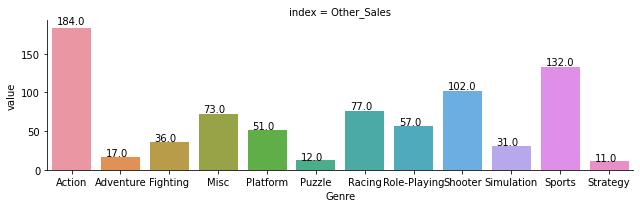

In [ ]:
OT_G = sb.catplot(x = 'Genre', y = 'value', col = 'index', kind = 'bar', 
                     data = OT, height = 3,aspect = 3 )
ax = OT_G.facet_axis(0,0)
for p in ax.patches:
  ax.text(p.get_x() + 0.1,
          p.get_height() * 1.02,
          round(p.get_height(),0),
          color = 'black',
          size = 'medium',
          rotation = 'horizontal')



* 북미 지역 : Action > Sports > Shooter > Platform > Misc
* 유럽 지역 :Action > Sports > Shooter > Racing > Misc
* 일본 지역 : Role-Playing > Action > Platform = Sports > Misc
* 기타 지역 : Action > Sports > Shooter > Racing = Misc

결론 : 일본을 제외하고 지역에 따라서 선호하는 게임장르가 동일하다.

# **필수 과제 2) 연도별 게임 트렌드가 다를까?**

In [ ]:
#연도별 지역 판매량 확인
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df_year = df.groupby(df['Year']).sum()
df_year.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Year,,,,,
1980.0,10.13,0.64,0.00,0.11,10.88
1981.0,33.40,1.96,0.00,0.32,35.68
1982.0,26.92,1.65,0.00,0.31,28.88
1983.0,7.76,0.80,8.10,0.14,16.80
1984.0,33.28,2.10,14.27,0.70,50.35


In [ ]:
NA_an = pd.crosstab(index = 'NA_Sales', columns = df['Year'], values = df['NA_Sales'], aggfunc = np.sum).fillna(0)
EU_an = pd.crosstab(index = 'EU_Sales', columns = df['Year'], values = df['EU_Sales'], aggfunc = np.sum).fillna(0)
JP_an = pd.crosstab(index = 'JP_Sales', columns = df['Year'], values = df['JP_Sales'], aggfunc = np.sum).fillna(0)
OT_an = pd.crosstab(index = 'Other_Sales', columns = df['Year'], values = df['Other_Sales'], aggfunc = np.sum).fillna(0)

In [ ]:
NA_anova = NA_an .iloc[0].tolist()
EU_anova = EU_an .iloc[0].tolist()
JP_anova = JP_an.iloc[0].tolist()
OT_anova = OT_an .iloc[0].tolist()

In [ ]:
from scipy.stats import f_oneway
f_oneway(NA_anova, EU_anova, JP_anova, OT_anova)

F_onewayResult(statistic=15.171232588344713, pvalue=1.0967895165598054e-08)

***가설 검정 : 연도에 따른 지역별 출고량 차이파악***

ANOVA test 진행


*   귀무가설 : 연도에 따른 지역별 출고량은 모두 동일하다.
*   대립가설 : 연도에 따른 지역별 출고량은 모두 동일하지 않다.


p값(1.0967895165598054e-08)은 0.05보다 작으므로 귀무가설을 기각한다.

결론 : 연도별로 지역들의 출고량은 차이가 있다.

Text(0.5, 1.0, 'Year x sales')

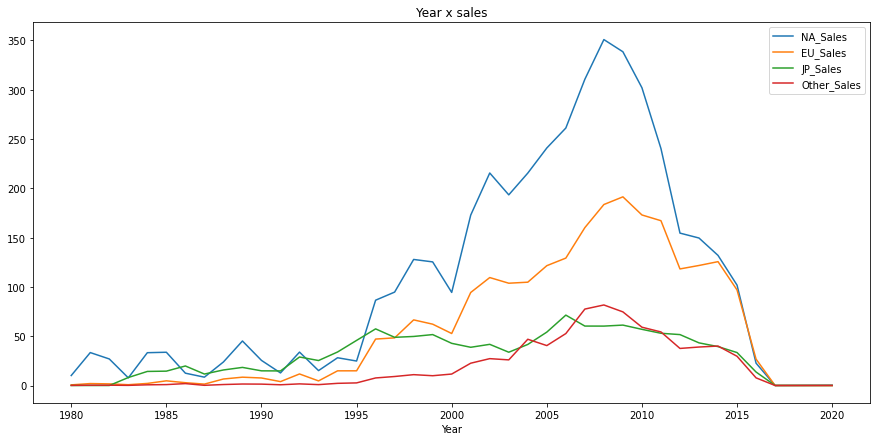

In [ ]:
df_year1 = df_year.iloc[:,:4]
plt.rcParams['figure.figsize'] = [15, 7]
sb.lineplot(data = df_year1,  dashes = False);
plt.title("Year x sales")

연도별로 지역마다 판매량의 차이가 있음.
1.   NA
2.   EU
3.   JP
4.   Other


In [ ]:
na = df['NA_Sales'].sum()
eu = df['EU_Sales'].sum()
jp = df['JP_Sales'].sum()
ot = df['Other_Sales'].sum()
total = df['Total_Sales'].sum()

na = (na/total)*100
eu = (eu/total)*100
jp = (jp/total)*100
ot = (ot/total)*100

print('북미시장 비율 : ', round(na,2) )
print('유럽시장 비율 : ', round(eu,2) )
print('일본시장 비율 : ', round(jp,2) )
print('기타지역 비율 : ', round(ot,2) )

북미시장 비율 :  49.19
유럽시장 비율 :  27.34
일본시장 비율 :  14.52
기타지역 비율 :  8.95


Genre   Action  Adventure  Fighting  ...  Simulation  Sports  Strategy
Year                                 ...                              
1980.0    0.34        0.0      0.77  ...        0.00    0.00       0.0
1981.0   14.79        0.0      0.00  ...        0.44    0.78       0.0
1982.0    6.50        0.0      0.00  ...        0.00    1.06       0.0
1983.0    2.86        0.4      0.00  ...        0.00    3.20       0.0
1984.0    1.85        0.0      0.00  ...        0.00    6.17       0.0

[5 rows x 12 columns]


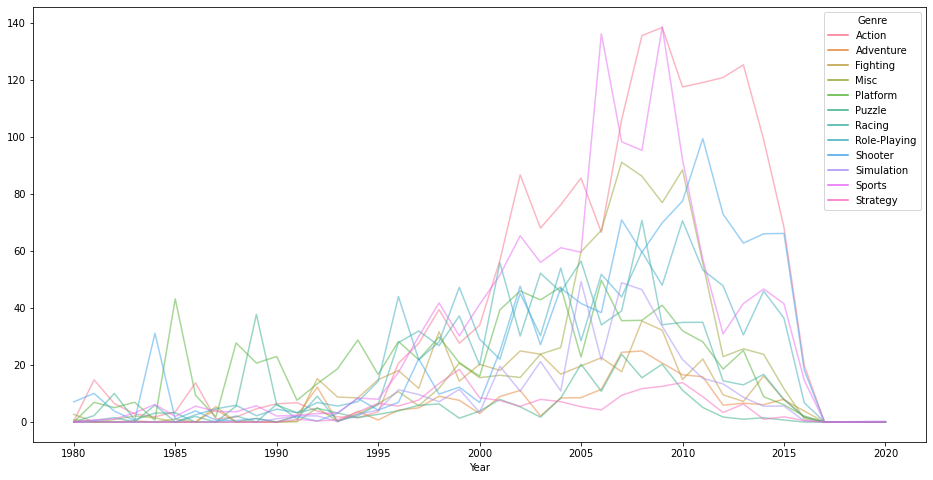

In [ ]:
#연도별 장르별 판매량 확인
df_cross_genre = pd.crosstab(index = df['Year'], columns = df['Genre'], values= df['Total_Sales'],aggfunc='sum').fillna(0)
print(df_cross_genre.head())
plt.rcParams['figure.figsize'] = [16, 8]
sb.lineplot(data = df_cross_genre,  dashes = False, alpha = 0.5);

**연도별 장르별 판매량으로 나타내게 되면 해당 연도 단순 판매량이 많은 장르가 당연히 높은 수치를 보이기 때문에 연도별 전체 판매량에서 장르별비율을 구해야함** 

In [ ]:
df_sum = df_cross_genre.sum(axis=1)
df_cross_genre['Total'] = df_sum

In [ ]:
df_sum1 = df_cross_genre.sum()
df_sum1

Genre
Action          1712.98
Adventure        234.02
Fighting         443.54
Misc             779.70
Platform         827.99
Puzzle           240.73
Racing           722.55
Role-Playing     901.51
Shooter         1024.75
Simulation       389.28
Sports          1305.34
Strategy         172.98
Total           8755.37
dtype: float64

In [ ]:
df_cross_genre1 = df_cross_genre.drop(['Strategy','Puzzle','Adventure'],axis = 1)

In [ ]:
df_cross_genre1.head()

Genre,Action,Fighting,Misc,Platform,Racing,Role-Playing,Shooter,Simulation,Sports,Total
Year,,,,,,,,,,
1980.0,0.34,0.77,2.70,0.00,0.00,0.0,7.07,0.00,0.00,10.88
1981.0,14.79,0.00,0.00,6.92,0.48,0.0,10.02,0.44,0.78,35.68
1982.0,6.50,0.00,0.87,5.03,1.57,0.0,3.81,0.00,1.06,28.88
1983.0,2.86,0.00,2.14,6.93,0.00,0.0,0.49,0.00,3.20,16.80
1984.0,1.85,0.00,1.45,0.69,5.95,0.0,31.10,0.00,6.17,50.35


In [ ]:
df_cross_genre.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Year,,,,,,,,,,,,,
1980.0,0.34,0.0,0.77,2.70,0.00,0.00,0.00,0.0,7.07,0.00,0.00,0.0,10.88
1981.0,14.79,0.0,0.00,0.00,6.92,2.25,0.48,0.0,10.02,0.44,0.78,0.0,35.68
1982.0,6.50,0.0,0.00,0.87,5.03,10.04,1.57,0.0,3.81,0.00,1.06,0.0,28.88
1983.0,2.86,0.4,0.00,2.14,6.93,0.78,0.00,0.0,0.49,0.00,3.20,0.0,16.80
1984.0,1.85,0.0,0.00,1.45,0.69,3.14,5.95,0.0,31.10,0.00,6.17,0.0,50.35


In [ ]:
Genre = df['Genre'].dropna().unique()
for i in Genre:
    df_cross_genre[i] = df_cross_genre[i] / df_cross_genre['Total']
df_cross_genre = df_cross_genre.iloc[:,:-1]

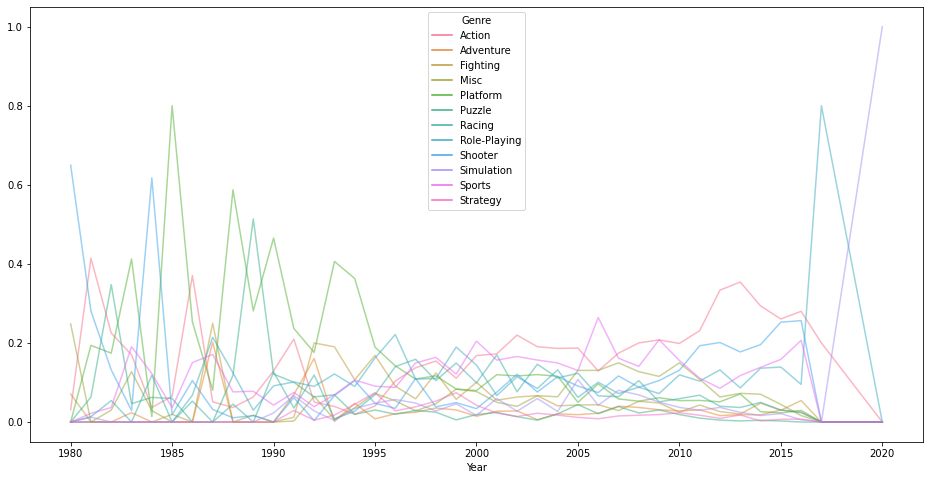

In [ ]:
plt.rcParams['figure.figsize'] = [16, 8]
sb.lineplot(data = df_cross_genre,  dashes = False, alpha = 0.5);

# **필수과제 3) 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

In [ ]:
#지역별 2000년 이후 상위 플랫폼, 높은 장르 분석
#결과에 해당하는 게임 도출
#연도별로 판매량의 차이가 있나?
df_top = df[(df.Year>1999)]
df_top_gs = df_top.groupby('Genre').sum().iloc[:-1,1:-1]
df_top_ps = df_top.groupby('Platform').sum().iloc[:-1,1:-1]
df_top_ys = df_top.groupby('Year').sum().iloc[:-1,:-1]

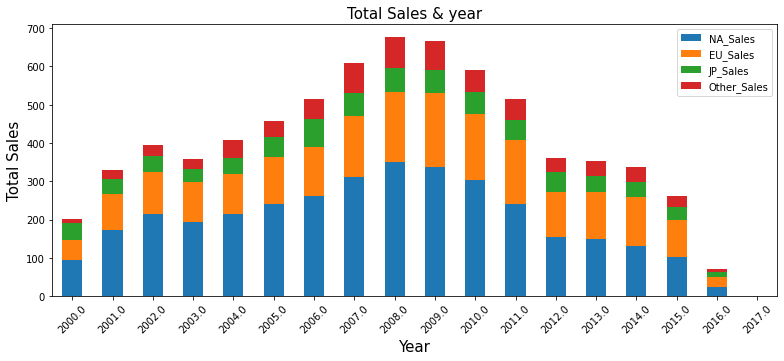

In [ ]:
#2000년 이후 게임 전체 출고량 현황
#2012년도 이후 게임시장 점점 축소
df_top_ys.plot.bar(stacked=True,figsize=(13,5))
plt.title('Total Sales & year', fontsize=15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize=15)
plt.xticks(rotation =  45 )
plt.show()

In [ ]:
df_top_yg = pd.DataFrame(df_top.pivot_table(index='Year',columns='Genre',values='Total_Sales',aggfunc=['sum'], fill_value=0))

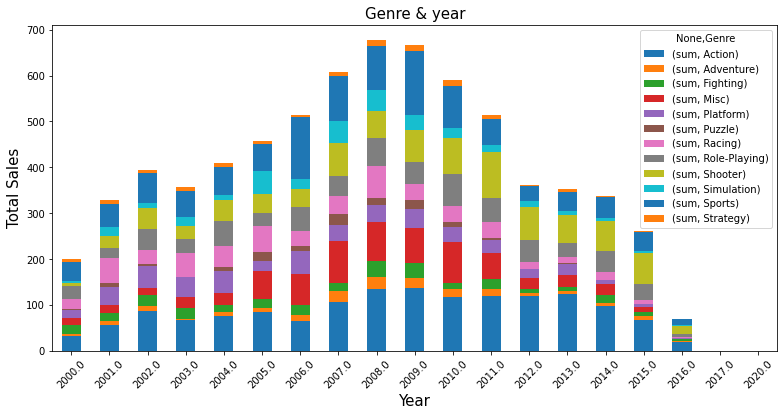

In [ ]:
df_top_yg.plot.bar(stacked=True,figsize=(13,6))
plt.title('Genre & year', fontsize=15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize=15)
plt.xticks(rotation =  45 )
plt.show()

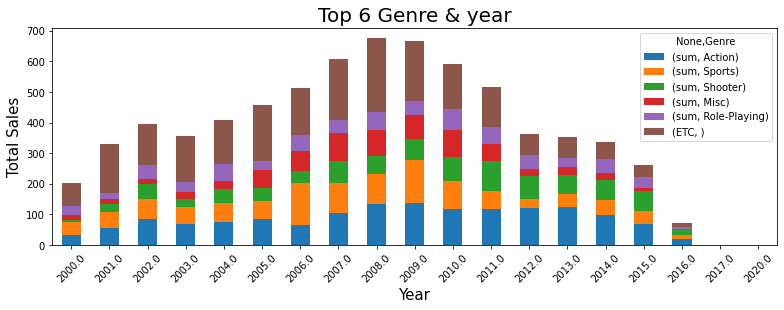

In [ ]:
#전체 장르에 대해서는 그래프 보기 힘듦. 장르 상위 절반으로만 추출
df_top_yg.loc['Total'] = df_top_yg.sum()
df_top_yg.sort_values(by='Total',axis=1,ascending=False, inplace=True)
df_top_yg_graph = df_top_yg.iloc[:-1,:5]
df_top_yg_graph['ETC'] = df_top_yg.iloc[:-1,5:].sum(axis=1)

df_top_yg_graph.plot.bar(stacked=True,figsize=(13,4))
plt.title('Top 6 Genre & year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize=15)
plt.xticks(rotation =  45 )
plt.show()

In [ ]:
df_top_yp = pd.DataFrame(df_top.pivot_table(index='Year',columns='Platform',values='Total_Sales',aggfunc=['sum'], fill_value=0))

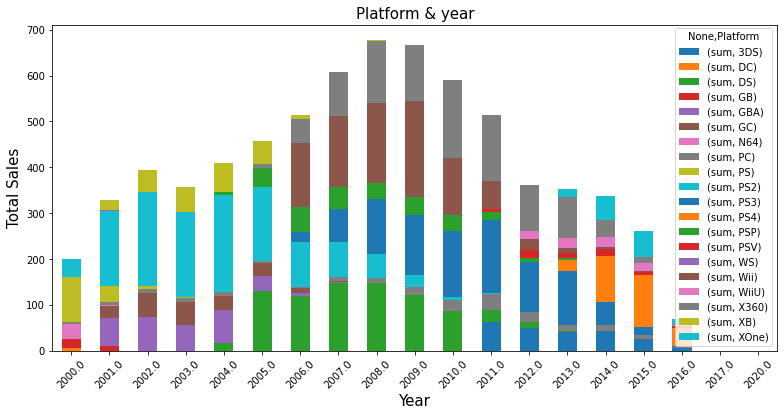

In [ ]:
df_top_yp.plot.bar(stacked=True,figsize=(13,6))
plt.title('Platform & year', fontsize=15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize=15)
plt.xticks(rotation =  45 )
plt.show()

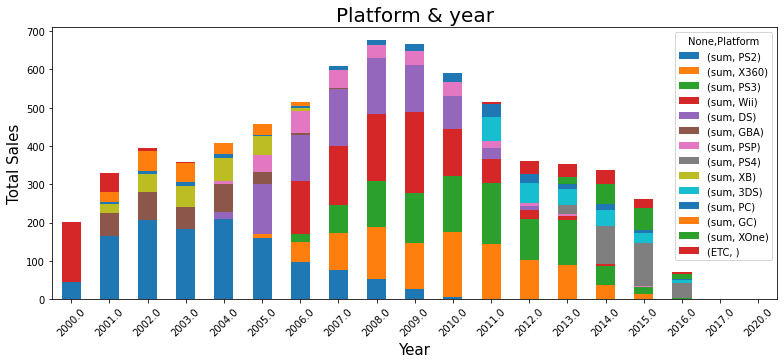

In [ ]:
#전체 장르에 대해서는 그래프 보기 힘듦. 장르 상위 절반으로만 추출
df_top_yp.loc['Total'] = df_top_yp.sum()
df_top_yp.sort_values(by='Total',axis=1,ascending=False, inplace=True)
df_top_yp_graph = df_top_yp.iloc[:-1,:13]
df_top_yp_graph['ETC'] = df_top_yp.iloc[:-1,13:].sum(axis=1)

df_top_yp_graph.plot.bar(stacked=True,figsize=(13,5))
plt.title('Platform & year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize=15)
plt.xticks(rotation =  45 )
plt.show()

In [ ]:
df_yg = df_top[(df_top.Genre == "Action") | (df_top.Genre == "Shooter")|(df.Genre == "Sports")]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
yg = df_yg.groupby(df_yg['Name']).sum().iloc[:,1:]

In [ ]:
yg

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,
.hack: Sekai no Mukou ni + Versus,0.00,0.00,0.03,0.00,0.03
007: Quantum of Solace,1.84,1.35,0.04,0.68,3.91
007: The World is not Enough,1.64,0.73,0.02,0.09,2.48
10 Minute Solution,0.06,0.01,0.00,0.01,0.08
1001 Touch Games,0.12,0.17,0.00,0.04,0.33
...,...,...,...,...,...
[Prototype],1.49,0.76,0.00,0.31,2.56
inFAMOUS,1.76,0.69,0.12,0.37,2.94
inFAMOUS 2,1.05,0.49,0.08,0.23,1.85


In [ ]:
yg_total=yg.sort_values(by='Total_Sales',ascending=False).iloc[:10,4:5]
yg_NA=yg.sort_values(by='NA_Sales',ascending=False).iloc[:10,0:1]
yg_EU=yg.sort_values(by='EU_Sales',ascending=False).iloc[:10,1:2]
yg_JP=yg.sort_values(by='JP_Sales',ascending=False).iloc[:10,2:3]
yg_OT=yg.sort_values(by='Other_Sales',ascending=False).iloc[:10,3:4]

In [ ]:
yg_EU

,EU_Sales
Name,
Wii Sports,29.02
Grand Theft Auto V,23.04
FIFA 15,12.40
Call of Duty: Modern Warfare 3,11.29
FIFA 16,11.29
FIFA 14,11.14
Call of Duty: Black Ops II,11.05
Wii Sports Resort,11.01
FIFA Soccer 13,10.25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


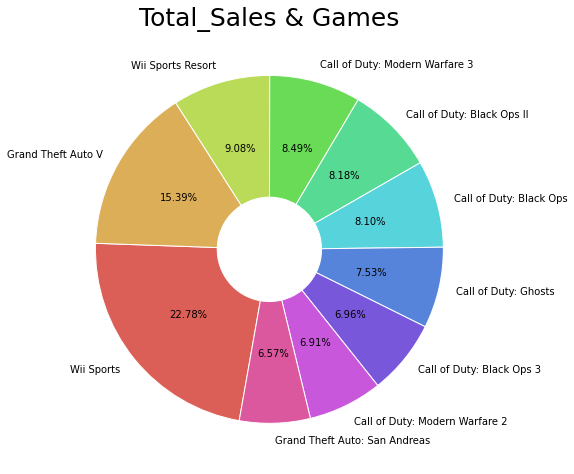

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]
wedgeprops={'width': 0.7, 'edgecolor': 'w'}
colors = sb.color_palette('hls',len(yg_total.index))
plt.pie(yg_total, labels = yg_total.index,autopct='%.2f%%'
, startangle=260, counterclock=False,colors=colors, wedgeprops=wedgeprops);
plt.title('Total_Sales & Games' , fontsize=25)
plt.show()
#top3장르에 대해서 상위 10개 게임 판매량 순위

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


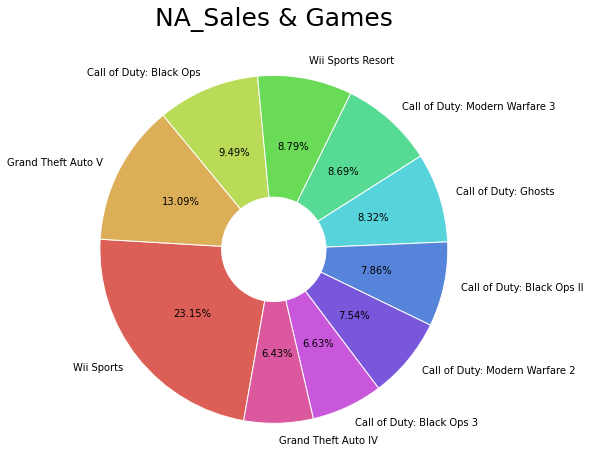

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]
wedgeprops={'width': 0.7, 'edgecolor': 'w'}
colors = sb.color_palette('hls',len(yg_NA.index))
plt.pie(yg_NA, labels = yg_NA.index,autopct='%.2f%%'
, startangle=260, counterclock=False ,colors=colors, wedgeprops=wedgeprops);
plt.title('NA_Sales & Games' , fontsize=25)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


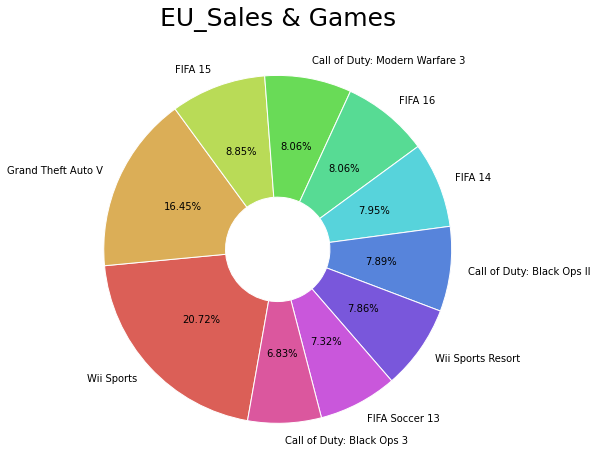

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]
wedgeprops={'width': 0.7, 'edgecolor': 'w'}
colors = sb.color_palette('hls',len(yg_EU.index))
plt.pie(yg_EU, labels = yg_EU.index,autopct='%.2f%%'
, startangle=260, counterclock=False ,colors=colors, wedgeprops=wedgeprops);
plt.title('EU_Sales & Games' , fontsize=25)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


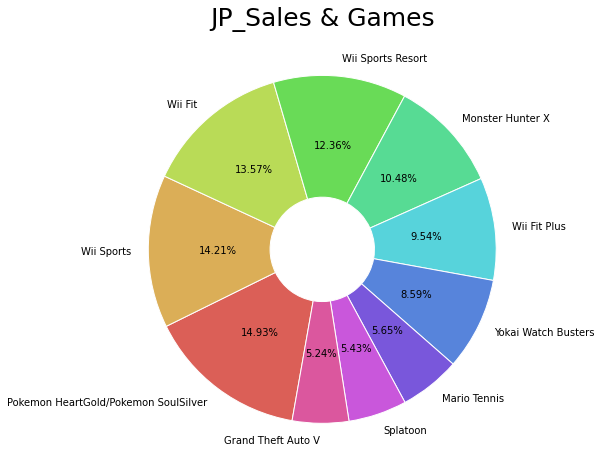

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]
wedgeprops={'width': 0.7, 'edgecolor': 'w'}
colors = sb.color_palette('hls',len(yg_JP.index))
plt.pie(yg_JP, labels = yg_JP.index,autopct='%.2f%%'
, startangle=260, counterclock=False ,colors=colors, wedgeprops=wedgeprops);
plt.title('JP_Sales & Games' , fontsize=25)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


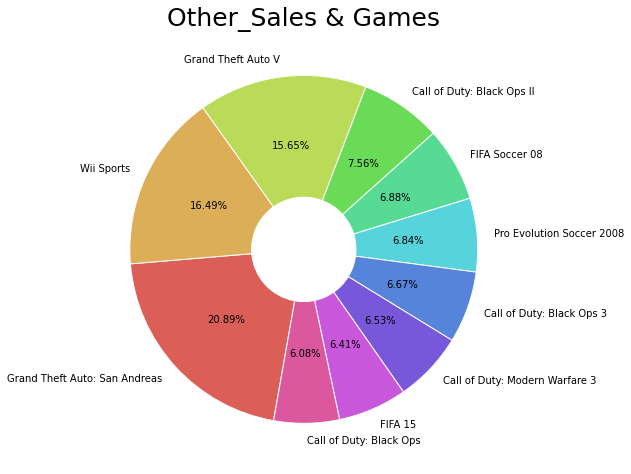

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]
wedgeprops={'width': 0.7, 'edgecolor': 'w'}
colors = sb.color_palette('hls',len(yg_OT.index))
plt.pie(yg_OT, labels = yg_OT.index,autopct='%.2f%%'
, startangle=260, counterclock=False ,colors=colors, wedgeprops=wedgeprops);
plt.title('Other_Sales & Games' , fontsize=25)
plt.show()

In [ ]:
df[df.Name.str.contains('Wii Sports')].sort_values('Year',ascending=False).iloc[2:3,:5]

,Name,Platform,Year,Genre,Publisher
2908,Wii Sports,Wii,2006.0,Sports,Nintendo


In [ ]:
df[df.Name.str.contains('Grand Theft Auto V')].sort_values('Year',ascending=False).iloc[:5,:5]

,Name,Platform,Year,Genre,Publisher
16575,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive
2008,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive
10834,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive
10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive


In [ ]:
df[df.Name.str.contains('Call of Duty: Modern Warfare 3')].sort_values('Year',ascending=False).iloc[:,:5]

,Name,Platform,Year,Genre,Publisher
2809,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision
4992,Call of Duty: Modern Warfare 3,Wii,2011.0,Shooter,Activision
8336,Call of Duty: Modern Warfare 3: Defiance,DS,2011.0,Shooter,Activision
11180,Call of Duty: Modern Warfare 3,PC,2011.0,Shooter,Activision
14120,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision


# **결론 : 다음 분기에 어떤 게임을 출시해야 할까?**

분석 종합결과로는 현재 게임시장 내 상위 점유율을 차지하고 있는 북미와 유럽시장을 공략하고 두 지역에서 선호하는 장르인 action 과 shooter장르를 바탕으로 현재 출시된 GTA 와 Call of duty 시리즈에 접목을 해야한다.
GTA 시리즈는 현재 플랫폼은 유지하되 업그레이드된 신규 시리즈를 출시하고, call of duty 시리즈는 현재 출시된 다양한 시리즈들을 최신 트렌드에 맞는 PS4, x-one 플랫폼에서도 지원하는 방향으로 잡아야  한다.